In [1]:
#chapter 06-07
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [3]:
print(digits.target[0])

0


In [4]:
print('전체 셈플의 수 : {}'.format(len(digits.images)))

전체 셈플의 수 : 1797


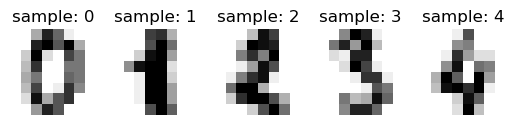

In [12]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]):
    plt.subplot(2,5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

In [13]:
for i in range(5):
    print(i, '번 인덱스 심플의 레이블 : ',digits.target[i])

0 번 인덱스 심플의 레이블 :  0
1 번 인덱스 심플의 레이블 :  1
2 번 인덱스 심플의 레이블 :  2
3 번 인덱스 심플의 레이블 :  3
4 번 인덱스 심플의 레이블 :  4


In [14]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [15]:
X = digits.data
Y = digits.target

In [16]:
import torch
import torch.nn as nn
from torch import optim

In [17]:
model = nn.Sequential(
nn.Linear(64, 32),
nn.ReLU(),
nn.Linear(32,16),
nn.ReLU(),
nn.Linear(16,10)
)

In [19]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [20]:
loss_fn = nn.CrossEntropyLoss()

In [21]:
optimizer = optim.Adam(model.parameters())

In [22]:
losses = []

In [23]:
for epoch in range(100):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, 100, loss.item()))
        
    losses.append(loss.item())

Epoch    0/100 Cost: 2.636945
Epoch   10/100 Cost: 2.137691
Epoch   20/100 Cost: 1.892654
Epoch   30/100 Cost: 1.603589
Epoch   40/100 Cost: 1.293882
Epoch   50/100 Cost: 0.985143
Epoch   60/100 Cost: 0.721223
Epoch   70/100 Cost: 0.530281
Epoch   80/100 Cost: 0.402578
Epoch   90/100 Cost: 0.317702


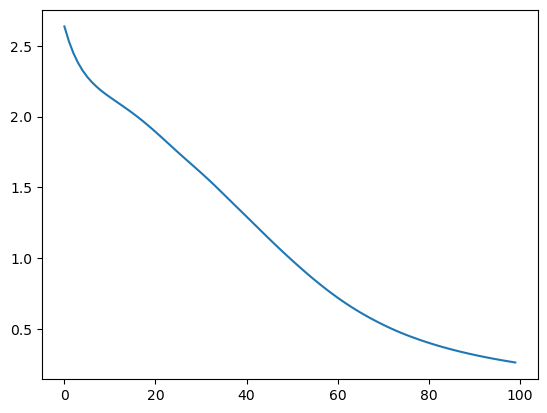

In [24]:
plt.plot(losses)